## Frequency Analysis 

<br>Case Normalization</br>
<br>Stopwords Removal </br>
<br>Tokenization</br>

In [1]:
import sys
import string
import json
import nltk
from collections import Counter
from nltk.tokenize import TweetTokenizer 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]

In [4]:
fname = r'C:\Users\Usman\Desktop\Project\bjp.json'
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt','via','...',',','e','','..','ji',"’",'... ']
count_for_tag = []
list_of_tag = []
tf = Counter()
with open(fname,'r') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = process(text=tweet['full_text'],
                        tokenizer=tweet_tokenizer,
                        stopwords=stopword_list)
        tf.update(tokens)
    for tag, count in tf.most_common(20):
        list_of_tag.append(tag)
        count_for_tag.append(count)
        print('{}:{}'.format(tag, count))

#bjp:19099
…:15408
vote:6573
india:4559
modi:4370
candidate:3628
dear:3103
voters:2666
#congress:2546
#modi:2425
gajanan:2422
sena:2415
symbol:2413
shiv:2410
bow:2357
sanjay:2357
@suchitrak:2356
#mumbainorthwest:2356
arrow:2356
kirtikar:2354


In [5]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import urllib
import requests
from PIL import Image
import pandas as pd

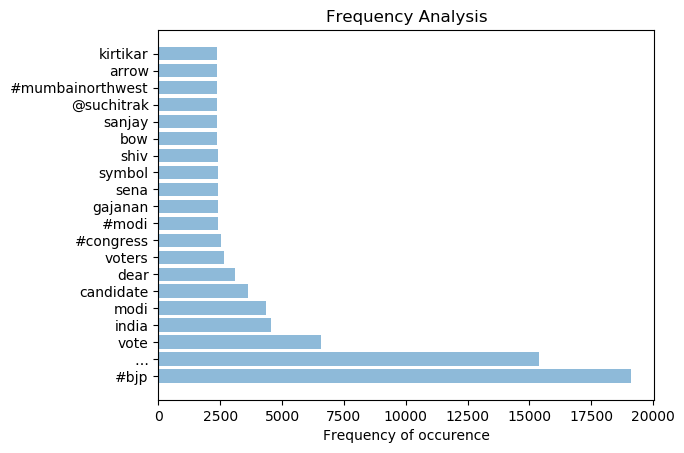

In [6]:
objects = tuple(list_of_tag)
y_pos = np.arange(len(objects))
performance = count_for_tag

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Frequency of occurence')
plt.title('Frequency Analysis')

plt.show()

In [7]:
df = pd.read_json(r'C:\Users\Usman\Desktop\Project\bjp.json',lines=True)
str1 = ' '.join(df['full_text'])
sw = STOPWORDS.union(set(['https', 'co', 'RT', 'arrow', 'symbol', 'bow', 'amp']))

In [8]:
def generate_wordcloud(words):
    word_cloud = WordCloud(width = 256, height = 256, background_color='white', stopwords=sw).generate(words)
    plt.figure(figsize=(5,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

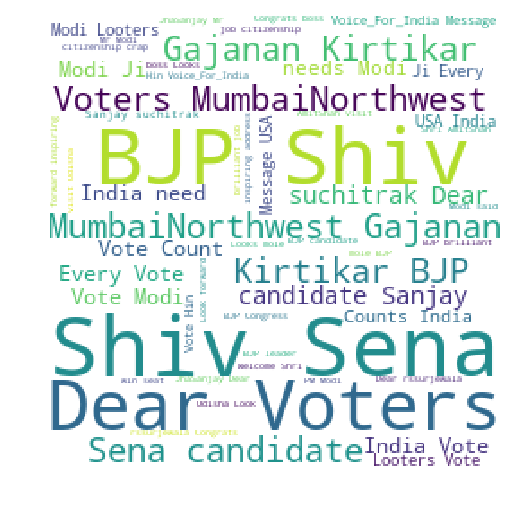

In [9]:
generate_wordcloud(str1)